# Sage Shaw

### ME 571 - Spring 2018

# HW 1 - Problem 4

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import random
import multiprocessing as mp

In [2]:
columns = ['Time', 'Processes', 'N', 'Error', 'colors']
data = pd.DataFrame(columns=columns)

def stats_from_timeit(timeit_result, procs, N, value, description):
    t = timeit_result.best
    data_row = {'Time': t, 'Processes': str(procs), 'N': N, 'Error': abs(value-np.pi)}
    return pd.Series(data=data_row, name=description)

# Single Processor

In [3]:
def single_calc(nums):
    #r = [x**2 + y**2 for x,y in nums]
    #hits = [1> radius for radius in r]
    #return 4 * sum(hits)/len(nums)
    return 4 * sum([x**2 + y**2 <= 1 for x, y in nums]) /len(nums)

In [4]:
nums = [(random(),random()) for i in range(10**4)]
single_calc(nums) - np.pi

0.010007346410207063

In [5]:
Ns = [10**i for i in range(2,7)]
val = 0

for N in Ns:
    nums = [(random(),random()) for i in range(N)]
    my_time = %timeit -o pass; global val; val = single_calc(nums)
    data = data.append(stats_from_timeit(my_time, 'Single', N, val, 'Single'))

10000 loops, best of 3: 39.5 µs per loop
1000 loops, best of 3: 397 µs per loop
100 loops, best of 3: 4 ms per loop
10 loops, best of 3: 41 ms per loop
1 loop, best of 3: 420 ms per loop


In [6]:
data

,Time,Processes,N,Error,colors
Single,0.000040,Single,100,0.098407,NaN
Single,0.000397,Single,1000,0.014407,NaN
Single,0.004002,Single,10000,0.023993,NaN
Single,0.040972,Single,100000,0.009967,NaN
Single,0.419504,Single,1000000,0.003427,NaN


## Multiprocessor

In [7]:
def calc_pi(proc_num, nums, ret_arr):
    pi = 4 * sum([x**2 + y**2 <= 1 for x, y in nums]) / len(nums)
    ret_arr[proc_num] = pi
    return

def multi_calc(nums, p):
    ret_arr = mp.Array('f', [0]*p)
    sublists = [nums[i::p] for i in range(p)]
    jobs = [mp.Process(target=calc_pi, args=(i, sublist, ret_arr) ) for i, sublist in enumerate(sublists)]
        
    for job in jobs: job.start() 
    for job in jobs: job.join() 
    
    return sum(ret_arr)/p

In [8]:
Ns = [10**i for i in range(2,8)]
Ps = [2**i for i in range(7)]
val = 0

for N in Ns:
    for P in Ps:
        for x in [0,1]:
            print('Running N: %d     P: %d' %(N,P))
            nums = [(random(),random()) for i in range(N)]
            my_time = %timeit -o pass; global val; val = multi_calc(nums,P)
            data = data.append(stats_from_timeit(my_time, str(P) + ' Processes', N, val, 'Parallel'))

Running N: 100     P: 1
100 loops, best of 3: 5.47 ms per loop
Running N: 100     P: 1
100 loops, best of 3: 5.56 ms per loop
Running N: 1000     P: 1
100 loops, best of 3: 6.01 ms per loop
Running N: 1000     P: 1
100 loops, best of 3: 6.06 ms per loop
Running N: 10000     P: 1
100 loops, best of 3: 11.3 ms per loop
Running N: 10000     P: 1
100 loops, best of 3: 11.1 ms per loop
Running N: 100000     P: 1
10 loops, best of 3: 61.2 ms per loop
Running N: 100000     P: 1
10 loops, best of 3: 62.1 ms per loop
Running N: 1000000     P: 1
1 loop, best of 3: 547 ms per loop
Running N: 1000000     P: 1
1 loop, best of 3: 539 ms per loop
Running N: 10000000     P: 1
1 loop, best of 3: 5.25 s per loop
Running N: 10000000     P: 1
1 loop, best of 3: 5.33 s per loop
Running N: 100     P: 2
100 loops, best of 3: 8.6 ms per loop
Running N: 100     P: 2
100 loops, best of 3: 8.39 ms per loop
Running N: 1000     P: 2
100 loops, best of 3: 8.66 ms per loop
Running N: 1000     P: 2
100 loops, best of

In [9]:
data

,Time,Processes,N,Error,colors
Single,0.000040,Single,100,0.098407,NaN
Single,0.000397,Single,1000,0.014407,NaN
Single,0.004002,Single,10000,0.023993,NaN
Single,0.040972,Single,100000,0.009967,NaN
Single,0.419504,Single,1000000,0.003427,NaN
Parallel,0.005474,1 Processes,100,0.021593,NaN
Parallel,0.005556,1 Processes,100,0.101593,NaN
Parallel,0.006014,1 Processes,1000,0.078407,NaN
Parallel,0.006063,1 Processes,1000,0.010407,NaN
Parallel,0.011338,1 Processes,10000,0.011207,NaN


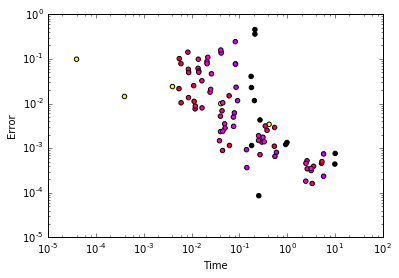

In [28]:
colors = {
            'Single': 'yellow' ,
            '1 Processes': '#FF0033',
            '2 Processes': '#FF0066',
            '4 Processes': '#FF0099',
            '8 Processes': '#FF00CC',
            '16 Processes': '#FF00FF',
            '32 Processes': '#CC00FF',
            '64 Processes': '#000000',
            '128 Processes': '#000000',
            '512 Processes': '#000000'
         }

data['colors'] = data['Processes'].map(colors)

data.plot(kind='scatter', x='Time', y='Error', color=data['colors'], loglog=True)


The Single Process in Serial runs are marked in yellow. The Parrallelized Processes move from red to purple as the number of processes increases. The black entries correspond to the Parallelized algorithm when it is ran on more processes than the number of cores on the machine.

# Analysis

The purple dots, coressponding to the Parallelized algorithm with a high processor count, seem to do the best. As the error decreases, the time increases less than it does for the more red dots. Some of the purple dots are clearly worse, but those are the instances when the processor count was higher than the number of cores on the machine. 

The red data points seem to be roughly linear but decreacing more slowly than the roughly linear purple points. This corresponds to a higher initialization cost (more costly for fewer data points i.e. less time) but a better growth rate as the number of points increases. 

While this is quite possibly the worst way to calculate $\pi$ it was fun!